# Lotka-Volterra 2D

## The Original Model in Ordinary Differential Equations

In [1]:
%matplotlib inline
from ecell4 import *

In [2]:
alpha = 1

with reaction_rules():
    ~u > u | u * (1 - v)
    ~v > v | alpha * v * (u - 1)

m = get_model()

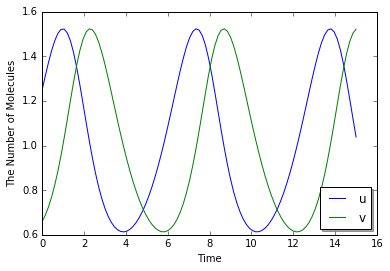

In [3]:
run_simulation(15, {'u': 1.25, 'v': 0.66}, model=m)

## The Modified Model Decomposed into Elementary Reactions

In [4]:
alpha = 1

with species_attributes():
    u | {'D': '0.1'}
    v | {'D': '0.1'}

with reaction_rules():
    u > u + u | 1.0
    u + v > v | 1.0

    u + v > u + v2 | alpha
    v2 > v + v | alpha * 10000.0
    v > ~v | alpha

m = get_model()

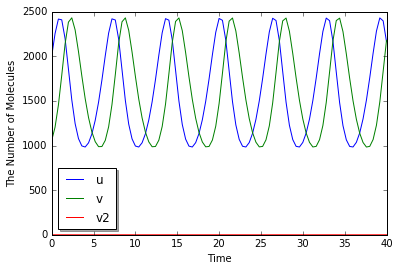

In [5]:
run_simulation(40, {'u': 1.25 * 1600, 'v': 0.66 * 1600}, volume=1600, model=m)

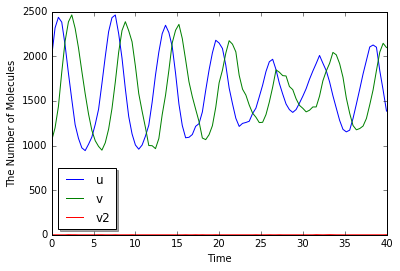

In [6]:
run_simulation(40, {'u': 1.25 * 1600, 'v': 0.66 * 1600}, volume=1600, model=m, solver='gillespie')

## A Lotka-Volterra-like Model in 2D

In [7]:
rng = GSLRandomNumberGenerator()
rng.seed(0)

In [8]:
w = meso.MesoscopicWorld(Real3(40, 40, 1), Integer3(160, 160, 1), rng)
w.bind_to(m)

In [9]:
V = w.volume()
print(V)

1600.0


In [10]:
w.add_molecules(Species("u"), int(1.25 * V))
w.add_molecules(Species("v"), int(0.66 * V))

In [11]:
sim = meso.MesoscopicSimulator(w)
obs1 = FixedIntervalNumberObserver(0.1, ('u', 'v', 'v2'))
obs2 = FixedIntervalHDF5Observer(2, "test%03d.h5")

In [12]:
sim.run(100, (obs1, obs2))

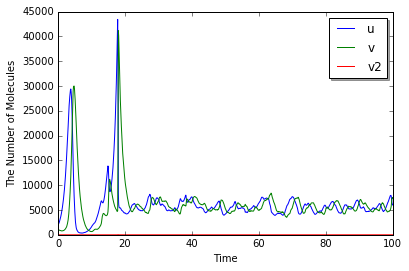

In [13]:
viz.plot_number_observer(obs1)

In [14]:
viz.plot_world(w, radius=0.2)

In [15]:
viz.plot_movie_with_attractive_mpl(
    obs2, linewidth=0, noaxis=True, figsize=6, whratio=1.4,
    angle=(-90, 90, 6), bitrate='10M')

In [16]:
# from zipfile import ZipFile
# with ZipFile('test.zip', 'w') as myzip:
#     for i in range(obs2.num_steps()):
#         myzip.write('test{:03d}.h5'.format(i))